# Effect of Isotropic error on Grover's Algorithm

In [1]:
from isotropic.algos.grover import (
    get_grover_circuit,
    optimal_num_iterations,
)
from isotropic.utils.state_transforms import generate_and_add_isotropic_error
from qiskit.quantum_info import Operator, Statevector
import jax.numpy as jnp

## Oracle

We first implement the oracle that will add a phase to our desired search item. 

**Note the negative sign on one of the diagonal entries.**

In [2]:
U_w = Operator(
    [
        [1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, -1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 1],
    ]
)

In [3]:
num_qubits = 3

## Grover's Circuit

Let's first find the optimal number of iterations

In [4]:
optimal_iterations = optimal_num_iterations(num_solutions=1, num_qubits=num_qubits)

We can now build the circuit and visualise it

In [5]:
grover_circuit = get_grover_circuit(num_qubits, U_w, optimal_iterations)

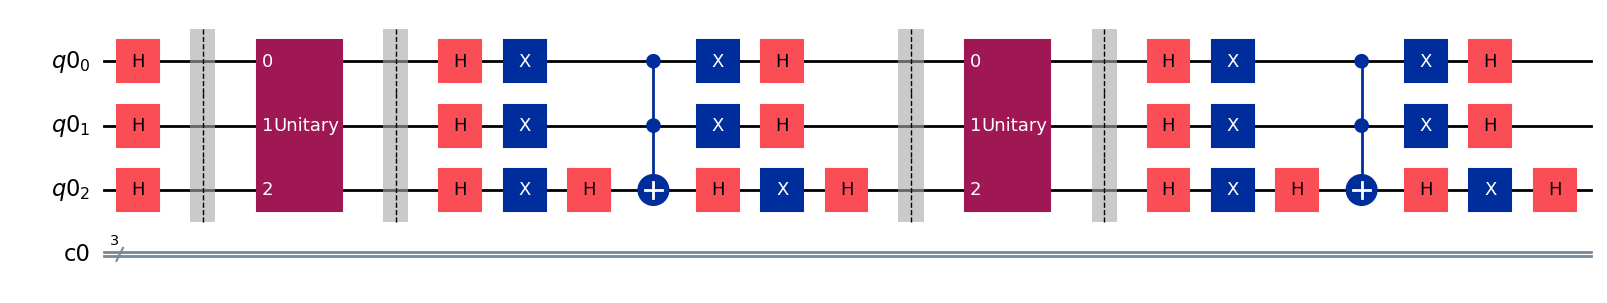

In [6]:
grover_circuit.draw("mpl")

## Statevector Inspection

Instead of executing the circuit, we check to see the final statevector before measurements.

In [7]:
statevector = Statevector(grover_circuit)

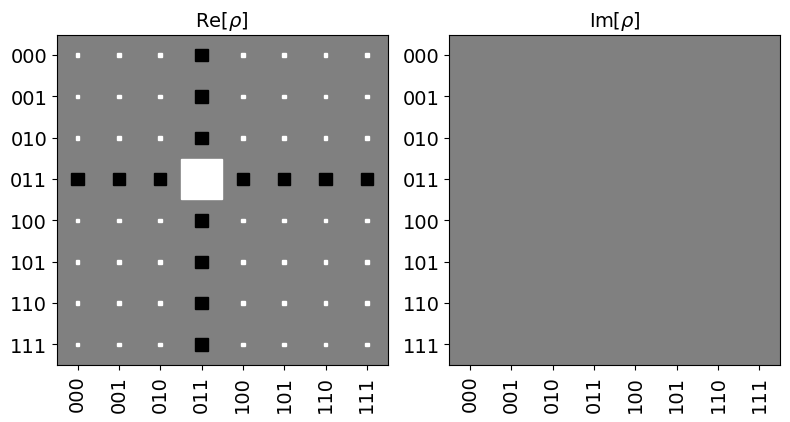

In [8]:
statevector.draw("hinton")

We see a very clear peak at `011` as expected from our designed oracle.

## Perturbation with isotropic error

Let us now look at the effect of adding an isotropic error

In [9]:
statevector_error = Statevector(
    generate_and_add_isotropic_error(statevector.data, sigma=0.9).tolist()
)

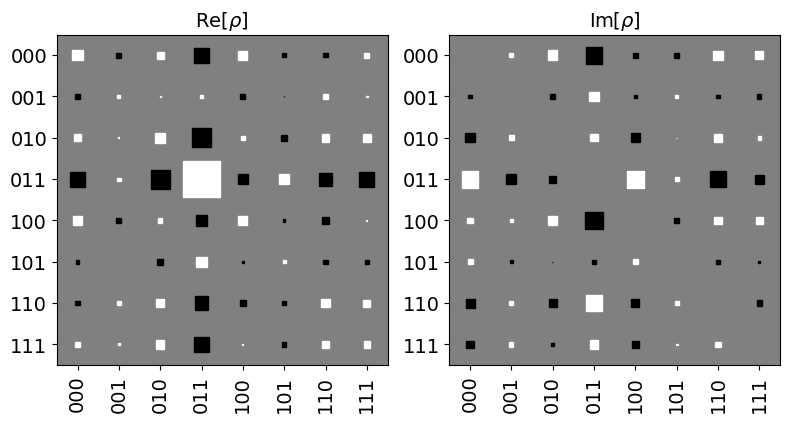

In [10]:
statevector_error.draw("hinton")

There is still a peak at `011` but there is now a signficant amount of noise in the hinton plot.

## State Overlap Fidelity

Finally, let's look at the state overlap fidelity of the perturbed state compared to the error free state. This will give us a quantitative measure of how much information is lost due to the introduction of the error.

In [11]:
print(
    f"Fidelity: {(jnp.abs(jnp.vdot(statevector.data, statevector_error.data)) ** 2).item() * 100: 4f} %"
)

Fidelity:  82.206430 %
